In [1]:
import pandas as pd

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Qureshi1234/mit_aiml/main/sales_data.csv')

In [3]:
df

,time_on_page,pages_viewed,interest_ski,interest_climb,buy
0,282.0,3.0,0,1,1
1,223.0,3.0,0,1,1
2,285.0,3.0,1,1,1
3,250.0,3.0,0,1,1
4,271.0,2.0,1,1,1
...,...,...,...,...,...
995,171.0,2.0,0,0,0
996,101.0,2.0,1,1,0
997,260.0,3.0,0,0,0
998,208.0,3.0,0,1,0


In [4]:
df['buy'].value_counts()

0    950
1     50
Name: buy, dtype: int64

<AxesSubplot:xlabel='buy'>

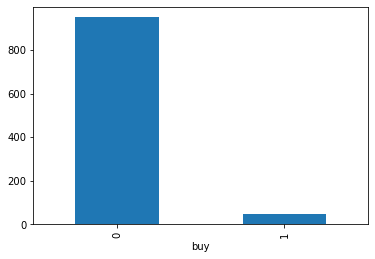

In [5]:
df.pivot_table(index = 'buy', aggfunc = 'size').plot(kind = 'bar')

In [ ]:
# we clearly see that there are a lot of non buyers against a small number of buyers.

In [6]:
# to model your data: 
# SPLIT THE DATA into Training and Testing
# training and testing dataset: 
from sklearn.model_selection import train_test_split

In [7]:
train, test = train_test_split(df, test_size = 0.3)

In [13]:
test.describe()  # 30% of information randomly assigned into testing dataset

,time_on_page,pages_viewed,interest_ski,interest_climb,buy
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,181.920000,1.973333,0.363333,0.396667,0.036667
std,64.420392,0.541850,0.481763,0.490023,0.188256
min,-34.000000,1.000000,0.000000,0.000000,0.000000
25%,145.750000,2.000000,0.000000,0.000000,0.000000
50%,182.500000,2.000000,0.000000,0.000000,0.000000
75%,220.000000,2.000000,1.000000,1.000000,0.000000
max,403.000000,4.000000,1.000000,1.000000,1.000000


In [14]:
train.describe() # 70% of information randomly assigned into training dataset

,time_on_page,pages_viewed,interest_ski,interest_climb,buy
count,700.000000,700.000000,700.000000,700.000000,700.000000
mean,181.548571,2.042857,0.380000,0.394286,0.055714
std,61.567755,0.642681,0.485734,0.489046,0.229533
min,5.000000,-0.000000,0.000000,0.000000,0.000000
25%,143.000000,2.000000,0.000000,0.000000,0.000000
50%,179.000000,2.000000,0.000000,0.000000,0.000000
75%,221.000000,2.000000,1.000000,1.000000,0.000000
max,439.000000,4.000000,1.000000,1.000000,1.000000


In [15]:
train['buy'].value_counts()

0    661
1     39
Name: buy, dtype: int64

In [16]:
661/700  # percentage of non buying 

0.9442857142857143

In [17]:
39/700  # percentage of buying 

0.055714285714285716

In [ ]:
# big issue in forcasting power of the model

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lg = LogisticRegression()

In [20]:
lg.fit(train[['time_on_page','pages_viewed','interest_ski', 'interest_climb']], train['buy'])

LogisticRegression()

In [21]:
pred = lg.predict(test[['time_on_page','pages_viewed','interest_ski', 'interest_climb']])

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
from sklearn.metrics import classification_report

In [ ]:
# imbalanced dataset
# mainly two way to solve this: 

# method1: 
    # undersampling: 
            0    950
            1     50
            
    # we take only 50 observations for every single category: 
    
            0    50
            1    50
            
# we are actually excluding majority of the dataset from actual data:  90% of observations excluded
    
# method2: 
    # oversampling: 
            0    950
            1     50
            
    # we take maximum observations for every single category: 
            0    950
            1    950     
            
# we are actually not excluding any observations from the actual dataset:  1900 observation

# issue: 
    # there are too many duplicates in one category: 
        # every single record in buy behaviour are duplicates 19 times
        
        
# based on second method: 

    # one better approach was discussed among statisticians: 
        # SMOTE: 
        
        
        # WE Create oversampling without duplicates: 
        # powerfull solution for imbalanced data: 
        
        
# SMOTE: Synthetic minority oversampling technique: knn model as input to create close dataset points in practice
        # 2002: Artificial intelligence journal
    
    # Data Augmentation: 
                # much like oversampling: 
                # rather than making exact duplicates of observations, you will add small perturbations to copied data points
        
        # you will draw a random sample from the minority class
                # knearest n
        
        
        
        

In [ ]:
# SMOTE with Logistic regression

In [25]:
!pip install imblearn

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.3.0 requires joblib~=1.1.0, but you have joblib 1.2.0 which is incompatible.


In [27]:
import imblearn

In [28]:
print(dir(imblearn))

['FunctionSampler', 'LazyLoader', '__IMBLEARN_SETUP__', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_version', 'base', 'combine', 'ensemble', 'exceptions', 'importlib', 'keras', 'metrics', 'over_sampling', 'pipeline', 'show_versions', 'sys', 'tensorflow', 'types', 'under_sampling', 'utils']


In [29]:
print(dir(imblearn.over_sampling))

['ADASYN', 'BorderlineSMOTE', 'KMeansSMOTE', 'RandomOverSampler', 'SMOTE', 'SMOTEN', 'SMOTENC', 'SVMSMOTE', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_adasyn', '_random_over_sampler', '_smote', 'base']


In [30]:
from imblearn.over_sampling import SMOTE

In [ ]:
# REshape our data: into 950 observations of non buy and 950 observations of buy

In [31]:
x_reshaped, y_reshaped = SMOTE().fit_resample(train[['time_on_page','pages_viewed','interest_ski', 'interest_climb']], train['buy'])

In [32]:
x_reshaped.describe()

,time_on_page,pages_viewed,interest_ski,interest_climb
count,1322.000000,1322.000000,1322.000000,1322.000000
mean,212.075314,2.463837,0.340393,0.555976
std,68.899730,0.724514,0.474021,0.497045
min,5.000000,-0.000000,0.000000,0.000000
25%,165.000000,2.000000,0.000000,0.000000
50%,208.500000,2.425407,0.000000,1.000000
75%,259.868135,3.000000,1.000000,1.000000
max,439.000000,4.000000,1.000000,1.000000


In [33]:
y_reshaped.describe()

count    1322.000000
mean        0.500000
std         0.500189
min         0.000000
25%         0.000000
50%         0.500000
75%         1.000000
max         1.000000
Name: buy, dtype: float64

In [35]:
y_reshaped.value_counts()

0    661
1    661
Name: buy, dtype: int64

In [36]:
logis = LogisticRegression()

In [37]:
logis.fit(x_reshaped, y_reshaped)

LogisticRegression()

In [38]:
pred2 = logis.predict(test[['time_on_page','pages_viewed','interest_ski', 'interest_climb']])

In [40]:
print(classification_report(test['buy'], pred2))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       289
           1       0.23      0.82      0.35        11

    accuracy                           0.89       300
   macro avg       0.61      0.86      0.65       300
weighted avg       0.96      0.89      0.92       300



In [24]:
print(classification_report(test['buy'], pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       289
           1       0.67      0.55      0.60        11

    accuracy                           0.97       300
   macro avg       0.82      0.77      0.79       300
weighted avg       0.97      0.97      0.97       300



In [41]:
# accuracy matrix

from sklearn.metrics import confusion_matrix

In [43]:
tn1, fp1, fn1, tp1 = confusion_matrix(test['buy'], pred).ravel()

In [48]:
print('True Negative:',tn1, '\nFalse Negative: ', fn1, '\nFalse positive: ', fp1, '\nTrue Positive:  ', tp1)

True Negative: 286 
False Negative:  5 
False positive:  3 
True Positive:   6


In [50]:
tn2, fp2, fn2, tp2 = confusion_matrix(test['buy'], pred2).ravel()

In [52]:
print('True Negative:',tn2, '\nFalse Negative: ', fn2, '\nFalse positive:', fp2, '\nTrue Positive:  ', tp2)

True Negative: 258 
False Negative:  2 
False positive: 31 
True Positive:   9


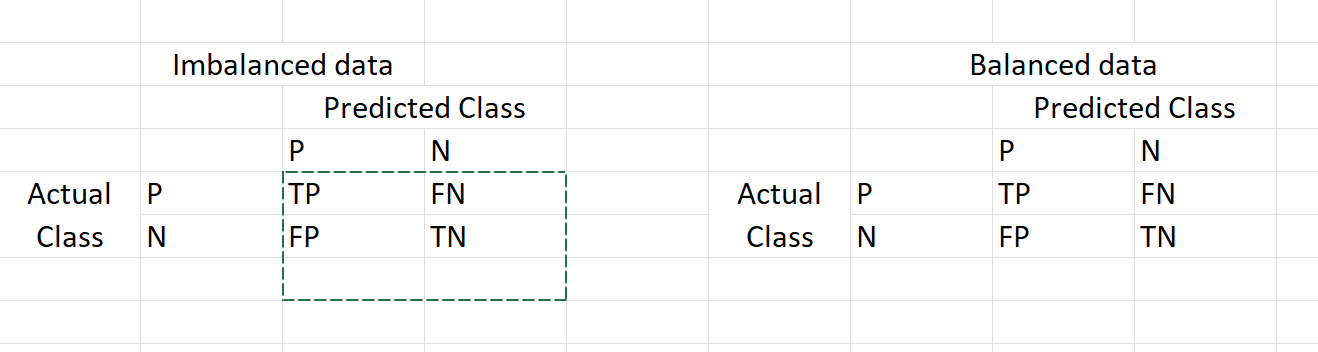

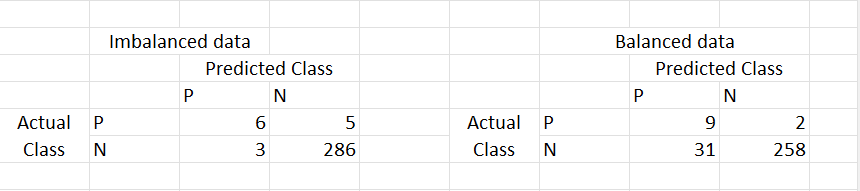

In [53]:
test['buy'].value_counts()

0    289
1     11
Name: buy, dtype: int64

In [54]:
# for buying behaviour :

9/11

0.8181818181818182

In [55]:
6/11

0.5454545454545454

In [56]:
286/289

0.9896193771626297

In [57]:
258/289

0.8927335640138409

In [ ]:
# TRUE POSITIVE: 

# BUY: 1: 
    # Imbalanced data: 
        # we only predicted buy: 6 only
        # with the help of balance data approach: 
                # we were able to identify 3 more buy with SMOTE Analysis